## Imports and setups

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from gtime.preprocessing import TimeSeriesPreparation
from gtime.plotting import seasonal_plot, seasonal_subplots, lag_plot, acf_plot

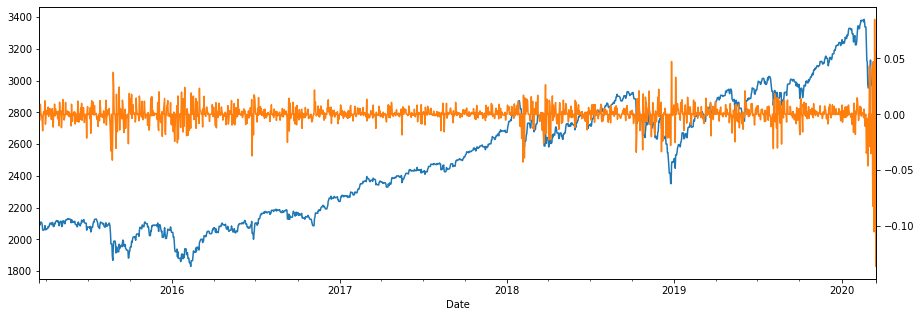

In [2]:
df_sp = pd.read_csv('https://storage.googleapis.com/l2f-open-models/giotto-time/examples/data/^GSPC.csv')
df_close = df_sp.set_index('Date')['Close']
df_close.index = pd.to_datetime(df_close.index)
time_series_preparation = TimeSeriesPreparation()
period_index_time_series = time_series_preparation.transform(df_close)
df = period_index_time_series.resample('D').fillna(method='ffill')
returns = (df.diff() / df).dropna()
ax = df.plot(figsize=(15, 5), legend=False)
ax = returns.plot(ax=ax, secondary_y=True, legend=False)

## EDA

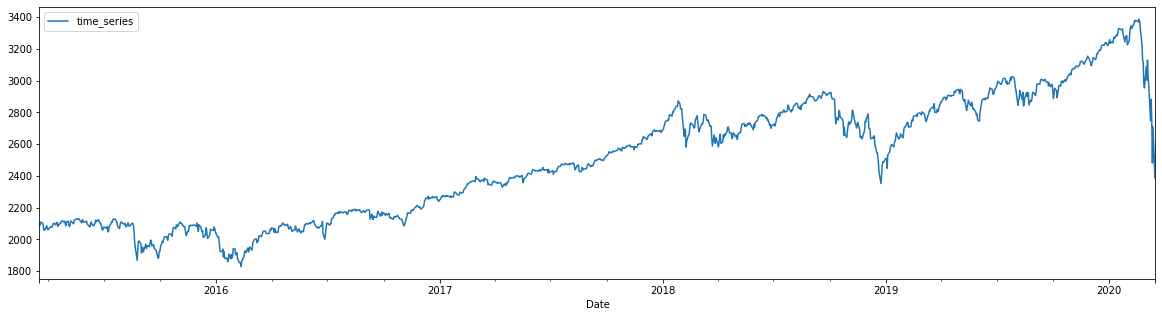

In [3]:
# basic plot
p = period_index_time_series.plot(figsize=(20, 5))

/Users/semyonburyachenko/Documents/Upwork/Giotto/venv/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


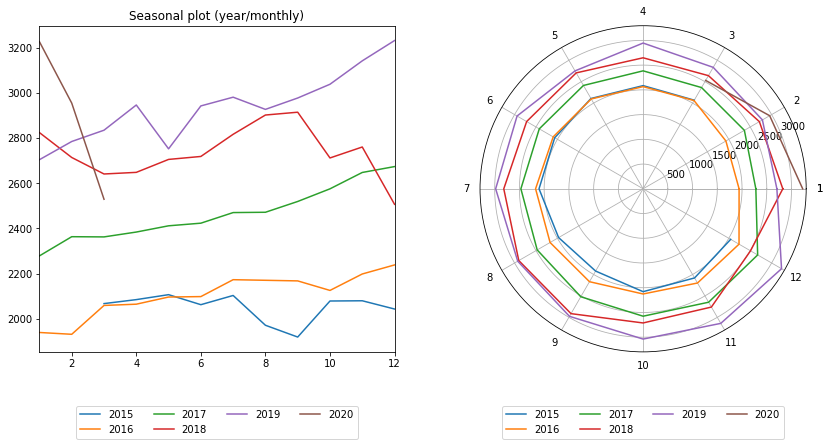

In [4]:
# Seasonal plots
fig = plt.figure(figsize=(14, 6))
m1 = fig.add_subplot(121, title='Seasonal plot (year/monthly)')
seasonal_plot(df.resample('M').last(), 'year', ax=m1)
m2 = fig.add_subplot(122, projection='polar')
seasonal_plot(df.resample('M').last(), 'year', ax=m2, polar=True);

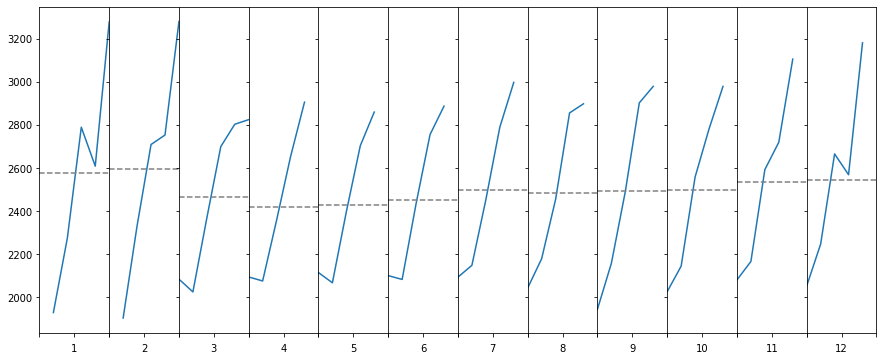

In [5]:
seasonal_subplots(df, 'year', 'M');

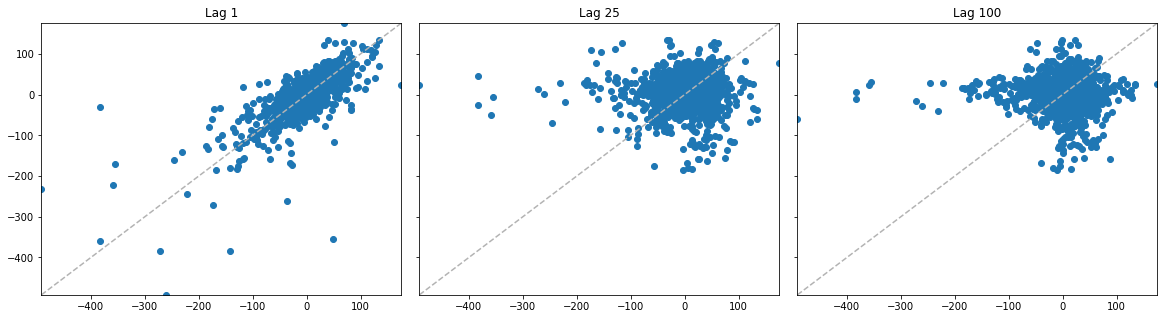

In [6]:
l = lag_plot(df.diff(5), lags=[1, 25, 100]);

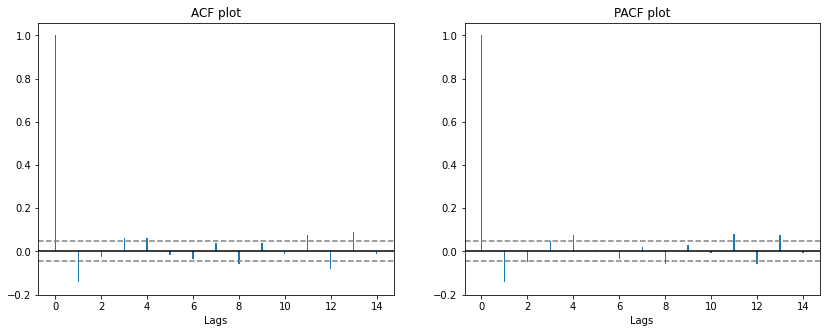

In [7]:
# ACF plots
fig = plt.figure(figsize=(14, 5))
a1 = fig.add_subplot(121, title='ACF plot')
acf_plot(returns, max_lags=15, ax=a1)
a2 = fig.add_subplot(122, title='PACF plot')
acf_plot(returns, max_lags=15, ax=a2, partial=True);